# Load Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy.optimize import curve_fit
from matplotlib.ticker import AutoMinorLocator

# Data Files

In [2]:
apo_file = 'data/apo_D34_D214_prot_state_combos_stage_11_to_65.dat'
holo_file = 'data/holo_D34_D214_prot_state_combos_stage_21_to_42.dat'

# Collect Data

In [3]:
def data_collect(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            if '#' not in line:
                split_line = re.split('\s+', line)
                split_line = split_line[:-1]
                dat_list = [float(dat) for dat in split_line]
                dat_add  = dat_list.append(float(split_line[2])+float(split_line[3]))
                data.append(dat_list)
    return data

In [4]:
apo_data = data_collect(apo_file)
holo_data = data_collect(holo_file)

In [5]:
apo_data

[[1.0, 0.99, 0.0, 0.01, 0.0, 0.01],
 [1.5, 0.98, 0.0, 0.02, 0.0, 0.02],
 [2.0, 0.95, 0.01, 0.04, 0.0, 0.05],
 [2.5, 0.87, 0.03, 0.09, 0.01, 0.12],
 [3.0, 0.71, 0.09, 0.17, 0.03, 0.26],
 [3.5, 0.46, 0.18, 0.25, 0.11, 0.43],
 [4.0, 0.22, 0.19, 0.29, 0.31, 0.48],
 [4.5, 0.06, 0.16, 0.19, 0.58, 0.35],
 [5.0, 0.01, 0.08, 0.08, 0.83, 0.16],
 [5.5, 0.0, 0.03, 0.02, 0.95, 0.05],
 [6.0, 0.0, 0.02, 0.01, 0.97, 0.03],
 [6.5, 0.0, 0.01, 0.01, 0.99, 0.02],
 [7.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [7.5, 0.0, 0.0, 0.0, 1.0, 0.0],
 [8.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [8.5, 0.0, 0.0, 0.0, 1.0, 0.0]]

# Fitting Functions

In [6]:
def p0_func(ph, pka1, pka2):
    f_ph = 1 / (1 + 10**(pka2-ph) + 10**(pka1+pka2-2*ph))
    return f_ph

def p1_func(ph, pka1, pka2):
    f_ph = 10**(pka2-ph) / (1 + 10**(pka2-ph) + 10**(pka1+pka2-2*ph))
    return f_ph

def p2_func(ph, pka1, pka2):
    f_ph = 10**(pka1+pka2-2*ph) / (1 + 10**(pka2-ph) + 10**(pka1+pka2-2*ph))
    return f_ph

# Plot Settings

## Colors

In [7]:
C1 = ('#FF0000') # Red
C2 = ('#80FF00') # Green
C3 = ('#00FFFF') # Cyan
C4 = ('#8000FF') # Purple
C5 = ('#FF00FC') # Pink 

colors  = [C1, C2, C3, C4, C5]

## Global Settings

In [8]:
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['savefig.pad_inches'] = 0

## Params for Inkscape

In [9]:
ink_x = 1.4 # 1.4
ink_y = 1.2 # 1.4

ink_markersize  = 2
ink_linewidth = 1 

# Plot Apo Data

## Plot with Fitting

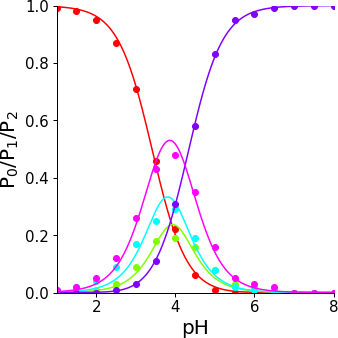

In [10]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
parm1 = 4
parm2 = 4
phs = [x[0] for x in apo_data]
for n, i in enumerate([1, 2, 3, 4, 5]):
    # plot points
    axes.plot(phs, [y[i] for y in apo_data], 'o', color=colors[n])
    # fitting
    if n == 0: # Doubly Protonated 
        # do fitting 
        c_fit_p2 = curve_fit(p2_func, phs, [y[i] for y in apo_data], p0=[parm1, parm2])
        p2_fit = []
        for x in np.linspace(0, 10, 500):
            p2_fit.append([x, p2_func(x, c_fit_p2[0][0], c_fit_p2[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p2_fit], [y[1] for y in p2_fit], '-', color=colors[n])
    if n == 3: # Doubly Deprotonated
        # do fitting 
        c_fit_p0 = curve_fit(p0_func, phs, [y[i] for y in apo_data], p0=[parm1, parm2])
        p0_fit = []
        for x in np.linspace(0, 10, 500):
            p0_fit.append([x, p0_func(x, c_fit_p0[0][0], c_fit_p0[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p0_fit], [y[1] for y in p0_fit], '-', color=colors[n])
    if n == 1 or n == 2: # Singlely Protonated
        # do fitting 
        c_fit_p1 = curve_fit(p1_func, phs, [y[i] for y in apo_data], p0=[parm1, parm2])
        p1_fit = []
        #print(f'N:{n}, {c_fit_p1[0][0]:0.2f}, {c_fit_p1[0][1]:0.2f}')
        for x in np.linspace(0, 10, 500):
            p1_fit.append([x, p1_func(x, c_fit_p1[0][0], c_fit_p1[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p1_fit], [y[1] for y in p1_fit], '-', color=colors[n])
    if n == 4: # Mono-protonated 
         # do fitting 
        c_fit_p1_all = curve_fit(p1_func, phs, [y[i] for y in apo_data], p0=[parm1, parm2])
        p1_fit_all = []
        #print(f'N:{n}, {c_fit_p1_all[0][0]:0.2f}, {c_fit_p1_all[0][1]:0.2f}')
        for x in np.linspace(0, 10, 500):
            p1_fit_all.append([x, p1_func(x, c_fit_p1_all[0][0], c_fit_p1_all[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p1_fit_all], [y[1] for y in p1_fit_all], '-', color=colors[n])
        
    

# plot labels
#legend = ['D133(0), D163(0)', 'D133(0), D163(-1)', 'D133(-1), D163(0)', 'D133(-1), D163(-1)']
#axes.legend(legend)
axes.set_xlabel('pH', fontsize=20)
axes.set_ylabel('P$_0$/P$_1$/P$_2$', fontsize=20)

# plot details
axes.set_ylim(0, 1)
axes.set_xlim(1, 8)
axes.tick_params(axis='both', labelsize=15)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/K300A_lrpsc_w_labels_comb_single_prot_state.pdf")
plt.show()

## Plot with out Fitting

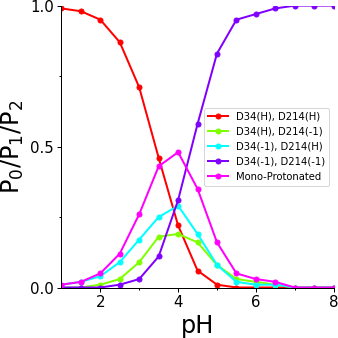

In [11]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
for i in [1, 2, 3, 4, 5]:
    axes.plot([x[0] for x in apo_data], [y[i] for y in apo_data], 'o-', 
              color=colors[i-1], linewidth=2, markersize=5, clip_on=True)


# plot labels
legend = ['D34(H), D214(H)', 'D34(H), D214(-1)', 'D34(-1), D214(H)', 'D34(-1), D214(-1)', 'Mono-Protonated']
axes.legend(legend)
axes.set_xlabel('pH', fontsize=24)
axes.set_ylabel('P$_0$/P$_1$/P$_2$', fontsize=24)

# plot details
axes.tick_params(axis='both', labelsize=15)
# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)
# X-Axis
axes.set_xlim(1, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/WT_lrpsc_w_labels.pdf")
plt.show()

## Final Plot and without Labels

### Without Fitting

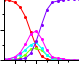

In [12]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (ink_x, ink_y))
fig.set_facecolor('white')

# plot points
for i in [1, 2, 3, 4, 5]:
    axes.plot([x[0] for x in apo_data], [y[i] for y in apo_data], 'o-', 
              color=colors[i-1], linewidth=ink_linewidth, markersize=ink_markersize, clip_on=True)

# plot details
# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)
# X-Axis
axes.set_xlim(1, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig('plots/K300A_lrpsc_no_labels.png', dpi=360, transparent=True)
plt.show()

### With Fitting

/home/jackh/Software/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


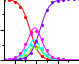

In [13]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (ink_x, ink_y))
fig.set_facecolor('white')

# plot points
phs = [x[0] for x in apo_data]
for n, i in enumerate([1, 2, 3, 4, 5]): 
    # plot points
    axes.plot(phs, [y[i] for y in apo_data], 'o', color=colors[n], markersize=ink_markersize, clip_on=True)
    # fitting
    if n == 0: # Doubly Protonated 
        # do fitting 
        c_fit_p2 = curve_fit(p2_func, phs, [y[i] for y in apo_data], p0=[3.2, 5.3])
        p2_fit = []
        for x in np.linspace(0, 10, 500):
            p2_fit.append([x, p2_func(x, c_fit_p2[0][0], c_fit_p2[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p2_fit], [y[1] for y in p2_fit], '-', color=colors[n], linewidth=ink_linewidth, clip_on=True)
    if n == 3: # Doubly Deprotonated
        # do fitting 
        c_fit_p0 = curve_fit(p0_func, phs, [y[i] for y in apo_data], p0=[3.2, 5.3])
        p0_fit = []
        for x in np.linspace(0, 10, 500):
            p0_fit.append([x, p0_func(x, c_fit_p0[0][0], c_fit_p0[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p0_fit], [y[1] for y in p0_fit], '-', color=colors[n], linewidth=ink_linewidth, clip_on=True)
    if n == 1 or n == 2: # Singlely Protonated
        # do fitting 
        c_fit_p1 = curve_fit(p1_func, phs, [y[i] for y in apo_data], p0=[3.2, 5.3])
        p1_fit = []
        for x in np.linspace(1, 9, 500):
            p1_fit.append([x, p1_func(x, c_fit_p1[0][0], c_fit_p1[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p1_fit], [y[1] for y in p1_fit], '-', color=colors[n], linewidth=ink_linewidth, clip_on=True)
    if n == 4: # Mono-protonated 
        # do fitting 
        c_fit_p1_all = curve_fit(p1_func, phs, [y[i] for y in apo_data], p0=[parm1, parm2])
        p1_fit_all = []
        for x in np.linspace(0, 10, 500):
            p1_fit_all.append([x, p1_func(x, c_fit_p1_all[0][0], c_fit_p1_all[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p1_fit_all], [y[1] for y in p1_fit_all], '-', color=colors[n], linewidth=ink_linewidth, clip_on=True)

# plot details
# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)
# X-Axis
axes.set_xlim(1, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
plt.savefig('plots/apo_prot_state_combos.png', dpi=360, transparent=True)
plt.show()

# Plot Holo Data

## Plot with Fitting

N:4, 2.50, 4.91


/home/jackh/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in power
  # Remove the CWD from sys.path while we load stuff.
/home/jackh/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


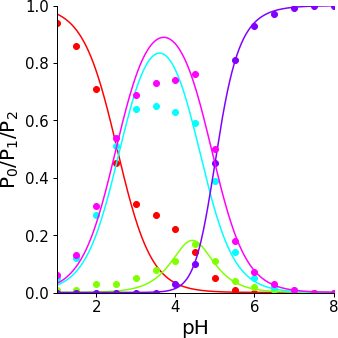

In [14]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
parm1 = 4
parm2 = 4
phs = [x[0] for x in holo_data]
for n, i in enumerate([1, 2, 3, 4, 5]):
    # plot points
    axes.plot(phs, [y[i] for y in holo_data], 'o', color=colors[n])
    # fitting
    if n == 0: # Doubly Protonated 
        # do fitting 
        c_fit_p2 = curve_fit(p2_func, phs, [y[i] for y in holo_data], p0=[parm1, parm2])
        p2_fit = []
        for x in np.linspace(0, 10, 500):
            p2_fit.append([x, p2_func(x, c_fit_p2[0][0], c_fit_p2[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p2_fit], [y[1] for y in p2_fit], '-', color=colors[n])
    if n == 3: # Doubly Deprotonated
        # do fitting 
        c_fit_p0 = curve_fit(p0_func, phs, [y[i] for y in holo_data], p0=[parm1, parm2])
        p0_fit = []
        for x in np.linspace(0, 10, 500):
            p0_fit.append([x, p0_func(x, c_fit_p0[0][0], c_fit_p0[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p0_fit], [y[1] for y in p0_fit], '-', color=colors[n])
    if n == 1 or n == 2: # Singlely Protonated
        # do fitting 
        c_fit_p1 = curve_fit(p1_func, phs, [y[i] for y in holo_data], p0=[parm1, parm2])
        p1_fit = []
        #print(f'N:{n}, {c_fit_p1[0][0]:0.2f}, {c_fit_p1[0][1]:0.2f}')
        for x in np.linspace(0, 10, 500):
            p1_fit.append([x, p1_func(x, c_fit_p1[0][0], c_fit_p1[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p1_fit], [y[1] for y in p1_fit], '-', color=colors[n])
    if n == 4: # Mono-protonated 
         # do fitting 
        c_fit_p1_all = curve_fit(p1_func, phs, [y[i] for y in holo_data], p0=[parm1, parm2])
        p1_fit_all = []
        print(f'N:{n}, {c_fit_p1_all[0][0]:0.2f}, {c_fit_p1_all[0][1]:0.2f}')
        for x in np.linspace(0, 10, 500):
            p1_fit_all.append([x, p1_func(x, c_fit_p1_all[0][0], c_fit_p1_all[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p1_fit_all], [y[1] for y in p1_fit_all], '-', color=colors[n])
        
    

# plot labels
#legend = ['D133(0), D163(0)', 'D133(0), D163(-1)', 'D133(-1), D163(0)', 'D133(-1), D163(-1)']
#axes.legend(legend)
axes.set_xlabel('pH', fontsize=20)
axes.set_ylabel('P$_0$/P$_1$/P$_2$', fontsize=20)

# plot details
axes.set_ylim(0, 1)
axes.set_xlim(1, 8)
axes.tick_params(axis='both', labelsize=15)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/K300A_lrpsc_w_labels_comb_single_prot_state.pdf")
plt.show()

## Plot with out Fitting

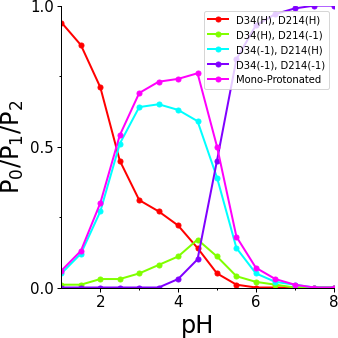

In [15]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (5,5))
fig.set_facecolor('white')

# plot points
for i in [1, 2, 3, 4, 5]:
    axes.plot([x[0] for x in holo_data], [y[i] for y in holo_data], 'o-', 
              color=colors[i-1], linewidth=2, markersize=5, clip_on=True)


# plot labels
legend = ['D34(H), D214(H)', 'D34(H), D214(-1)', 'D34(-1), D214(H)', 'D34(-1), D214(-1)', 'Mono-Protonated']
axes.legend(legend)
axes.set_xlabel('pH', fontsize=24)
axes.set_ylabel('P$_0$/P$_1$/P$_2$', fontsize=24)

# plot details
axes.tick_params(axis='both', labelsize=15)
# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=True)
# X-Axis
axes.set_xlim(1, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=True)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig("plots/WT_lrpsc_w_labels.pdf")
plt.show()

## Final Plot and without Labels

### Without Fitting

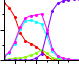

In [16]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (ink_x, ink_y))
fig.set_facecolor('white')

# plot points
for i in [1, 2, 3, 4, 5]:
    axes.plot([x[0] for x in holo_data], [y[i] for y in holo_data], 'o-', 
              color=colors[i-1], linewidth=ink_linewidth, markersize=ink_markersize, clip_on=True)

# plot details
# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)
# X-Axis
axes.set_xlim(1, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
#plt.savefig('plots/K300A_lrpsc_no_labels.png', dpi=360, transparent=True)
plt.show()

### With Fitting

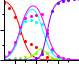

In [17]:
# Fold Cell
plt.close('all')
fig, axes = plt.subplots(figsize= (ink_x, ink_y))
fig.set_facecolor('white')

# plot points
phs = [x[0] for x in holo_data]
for n, i in enumerate([1, 2, 3, 4, 5]):
    # plot points
    axes.plot(phs, [y[i] for y in holo_data], 'o', color=colors[n], markersize=ink_markersize, clip_on=True)
    # fitting
    if n == 0: # Doubly Protonated 
        # do fitting 
        c_fit_p2 = curve_fit(p2_func, phs, [y[i] for y in holo_data], p0=[3.2, 5.3])
        p2_fit = []
        for x in np.linspace(0, 10, 500):
            p2_fit.append([x, p2_func(x, c_fit_p2[0][0], c_fit_p2[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p2_fit], [y[1] for y in p2_fit], '-', color=colors[n], linewidth=ink_linewidth, clip_on=True)
    if n == 3: # Doubly Deprotonated
        # do fitting 
        c_fit_p0 = curve_fit(p0_func, phs, [y[i] for y in holo_data], p0=[3.2, 5.3])
        p0_fit = []
        for x in np.linspace(0, 10, 500):
            p0_fit.append([x, p0_func(x, c_fit_p0[0][0], c_fit_p0[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p0_fit], [y[1] for y in p0_fit], '-', color=colors[n], linewidth=ink_linewidth, clip_on=True)
    if n == 1 or n == 2: # Singlely Protonated
        # do fitting 
        c_fit_p1 = curve_fit(p1_func, phs, [y[i] for y in holo_data], p0=[3.2, 5.3])
        p1_fit = []
        for x in np.linspace(1, 9, 500):
            p1_fit.append([x, p1_func(x, c_fit_p1[0][0], c_fit_p1[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p1_fit], [y[1] for y in p1_fit], '-', color=colors[n], linewidth=ink_linewidth, clip_on=True)
    if n == 4: # Mono-protonated 
        # do fitting 
        c_fit_p1_all = curve_fit(p1_func, phs, [y[i] for y in holo_data], p0=[parm1, parm2])
        p1_fit_all = []
        for x in np.linspace(0, 10, 500):
            p1_fit_all.append([x, p1_func(x, c_fit_p1_all[0][0], c_fit_p1_all[0][1])])
        # plot fitting 
        axes.plot([x[0] for x in p1_fit_all], [y[1] for y in p1_fit_all], '-', color=colors[n], linewidth=ink_linewidth, clip_on=True)

# plot details
# Y-Axis 
axes.set_ylim(0, 1)
axes.set_yticks([0, 0.5, 1.0])
axes.yaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelleft=False)
# X-Axis
axes.set_xlim(1, 8)
axes.set_xticks([2, 4, 6, 8])
axes.xaxis.set_minor_locator(AutoMinorLocator(2))
axes.tick_params(labelbottom=False)

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

fig.tight_layout()
plt.savefig('plots/holo_prot_state_combos.png', dpi=360, transparent=True)
plt.show()